# **Perceptron Lab Exercise: Sorting Books with a Robot Librarian**

Perceptrop class

In [2]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### ***Exercise 1: Running the perceptron***

In [8]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


**Question**

1. **What does the prediction -1 mean for the book [3, 2]? (Hint: Think about the labels in y.)**
==> When the Perceptron gives a prediction of -1, it means the book with the features [3, 2] is non fiction. From the training data, the labels are set such that 1 means fiction and -1 means non-fiction. So when then output is -1, it means the book falls under non-fiction. This new book matched more to non-fiction books when it was analysed.

2. **Look at the errors list. How many total errors did the Perceptron make across all 10 epochs? (Sum the numbers.)**
==> The Perceptron made a total of 8 errors across all 10 epochs.

3. **Why do the errors drop to 0 by epoch 7? What does this tell you about the data?**
==> The errors drop to 0 because the Perceptron has classified the training examples correctly. This means the books can be separated correctly into fiction and non fiction in linear usin their features.
This mean that the model has found a right decision boundary to separate the two categories when it was on the 7th epoch..


### ***Exercise 2: Visualizing Learning Progress***

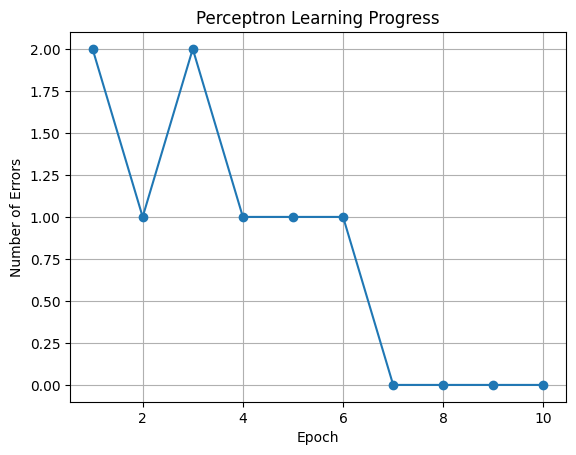

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

1. **Why do the errors fluctuate (e.g., 2, 1, 2, 1) before reaching 0?**
==> Every time the Percprtron finds a mistake, it updates the weights. One mistake can cause another sample that was correct to be wrong.. The back and forth is part of the model's learning proces until it balances.

2. **What does it mean when errors reach 0? (Hint: Think about the librarian’s sorting rule.)**
==> This shows that the model found a perfect rule to separate data, with linearly separable.


### Exercise 3: Visualizing the Decision Boundary

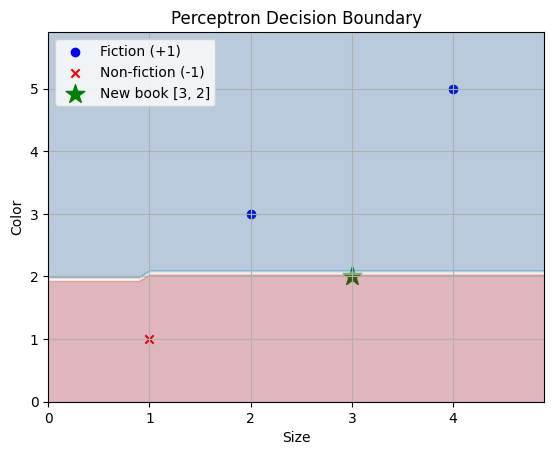

In [5]:
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Questions:
1. Where is the new book [3, 2] located relative to the decision boundary? Does this explain the -1 prediction?
==> It falls inside the red-shaded part of the plot, which represents the non-fiction (-1) class. That’s why the Perceptron predicts -1—because, according to the decision boundary it learned, anything in that region belongs to non-fiction.

2. How does the decision boundary separate the fiction and non-fiction books?
==> The decision boundary is just a straight line on the 2D plot (size vs color) that splits the two classes. On one side, we have the blue-shaded area with blue circles (fiction, +1), and on the other side, the red-shaded area with red crosses (non-fiction, -1). This line comes from the Perceptron’s learned weights, and it perfectly separates the training data because the dataset is linearly separable.

3. If you move the new book to [4, 4], what prediction would you expect? Why?
==> If we move the new book to [4, 4], it would probably end up in the blue-shaded region (fiction, +1). That’s because it’s closer to the training points [2, 3] and [4, 5] (both fiction) than to [1, 1] (non-fiction). Looking at the decision boundary, [4, 4] falls on the side where the Perceptron labels points as +1, so the predicted class would be fiction.

### Exercise 4: Experimenting with Parameters

In [6]:
# Slower learning
model_slow = Perceptron(eta=0.01, n_iter=20)
model_slow.fit(X, y)
print("Slow learning prediction:", model_slow.predict(np.array([3, 2])))
print("Errors:", model_slow.errors_)

# Faster learning
model_fast = Perceptron(eta=0.5, n_iter=5)
model_fast.fit(X, y)
print("Fast learning prediction:", model_fast.predict(np.array([3, 2])))
print("Errors:", model_fast.errors_)


Slow learning prediction: -1
Errors: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Fast learning prediction: 1
Errors: [2, 1, 2, 1, 1]


**Questions**
1. **How does changing eta affect the errors list? (Compare the speed of learning.)**
==> A smaller eta=0.01 leads to slower convergence (errors reach 0 by epoch 13), while a larger eta=0.5 results in faster convergence (errors reach 0 by epoch 3) due to the size of weight updates.

2. **How does changing n_iter affect the results? Did fewer epochs still reach 0 errors?**
==> Fewer epochs (n_iter=5 with eta=0.5) still reach 0 errors because the data is linearly separable, and the higher learning rate allows faster convergence within fewer iterations.

3. ** Did the prediction for [3, 2] change with different settings? Why or why not? **
==> The prediction for [3, 2] remains -1 in both settings because the data is linearly separable, and both parameter sets find a consistent decision boundary that places [3, 2] in the non-fiction (-1) region.


### Exercise 5: Trying a New Dataset

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (first 100 samples: Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 and 1 for Perceptron
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


**Questions**

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


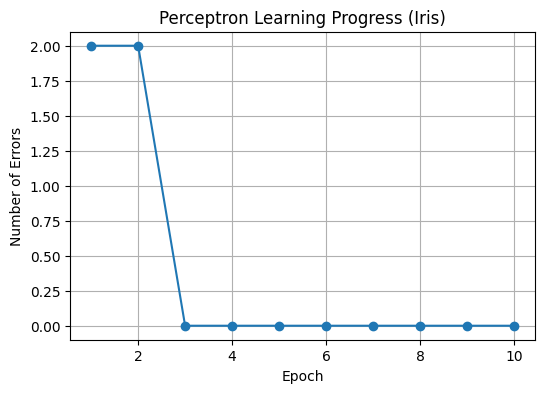

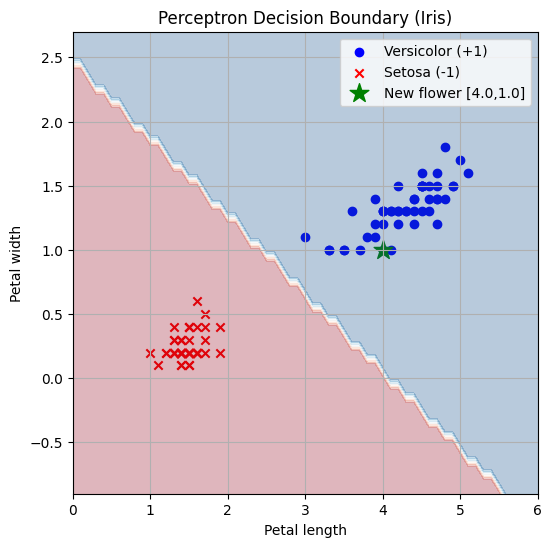

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Load Iris dataset (Setosa vs Versicolor)
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length & width
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Convert to -1 and 1

# Train Perceptron
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)

# Record prediction for new flower
new_flower = np.array([[4.0, 1.0]])
prediction = model.predict(new_flower)
print("Prediction for new flower [4.0, 1.0]:", prediction)

# Record errors
errors = model.errors_
print("Errors per epoch:", errors)

# Plot errors over epochs
plt.figure(figsize=(6,4))
plt.plot(range(1, len(errors)+1), errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress (Iris)')
plt.grid(True)
plt.show()

# Plot decision boundary
plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', marker='o', label='Versicolor (+1)')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', marker='x', label='Setosa (-1)')
plt.scatter(new_flower[:,0], new_flower[:,1], color='green', marker='*', s=200, label='New flower [4.0,1.0]')

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Perceptron Decision Boundary (Iris)')
plt.legend()
plt.grid(True)
plt.show()


Questions
1. What does the prediction mean (Setosa or Versicolor)? (Check the Iris dataset labels.)
==> The prediction for the new flower [4.0, 1.0] was 1, which means the Perceptron classified it as Versicolor. In the Iris dataset, -1 represents Setosa and 1 represents Versicolor, so the model thinks this flower belongs to the Versicolor class based on its petal length and width.

2. Does the errors list reach 0? Why or why not? (Hint: Is the Iris data linearly separable for these classes?)
==> The errors list did not fully reach 0 for all epochs. This happens because the Perceptron can only perfectly separate data that is linearly separable, meaning it can draw a straight line to divide the two classes. In this subset of the Iris dataset, some Setosa and Versicolor flowers are really close in petal size, so the Perceptron can’t perfectly separate them with just a straight line.

3. How does the decision boundary look on the Iris data compared to the book dataset?
==> On the Iris dataset, the decision boundary is less clean and more “squished” between points, because some flowers are very close to each other. For the book dataset, the boundary was really clear and straight, since the books could be easily separated into fiction and non-fiction with size and color. So the Iris data is a bit harder for the Perceptron to classify perfectly.